# CSC 219 - Final Project
## Image Classification with Fashion-MNIST and CIFAR-10
### Khoi Hoang

# Abstract
There are many different technique and models to solve the problem of image classification.  
It is important for students to fully understand the principles behind each model and its performance based on the dataset.  
The purpose of this project is to gain a deeper understanding of different classification models, and how they perform on the Fashion-MNIST and CIFAR-10 dataset.  

In [23]:
import collections
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from IPython.display import Markdown, display
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Helper function
# Print markdown style
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Fashion-MNIST dataset

The following information is taken from Keras website: https://keras.io/datasets/  
The Fashion-MNIST dataset consists of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.  
The class labels for the data are:

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle Boot |

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Using TensorFlow backend.


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


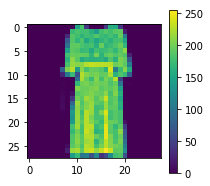

Image (#1902): Which is label number '3', or label 'Dress''


In [17]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(3,3))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))

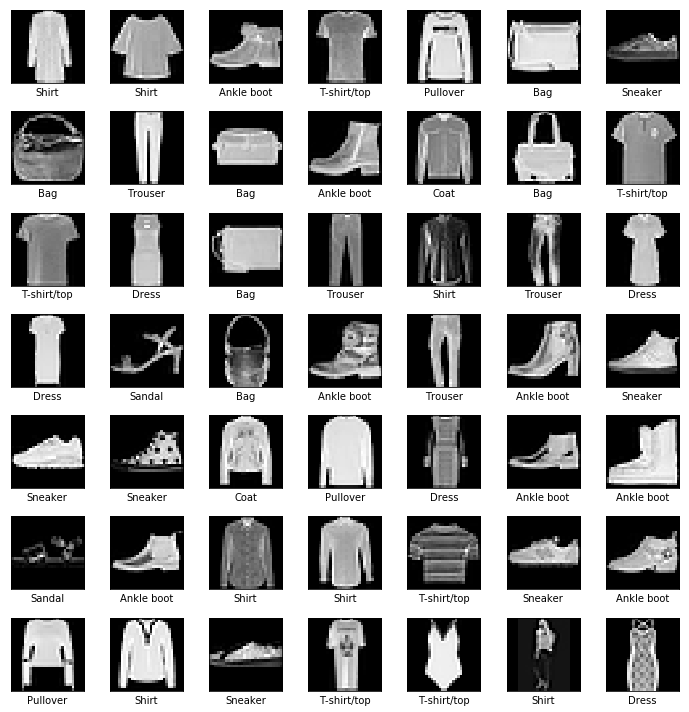

In [19]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

# Classic ML models

* In this section I examine the following Machine Learning Models without using any features extraction method:
    - SVM
    - KNN
    - Random Forest
    - Decision Tree

In [21]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [25]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train, y_train)

end1 = time.time()
svm_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

end2 = time.time()
knn_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train, y_train)

end3 = time.time()
forest_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train, y_train)

end4 = time.time()
tree_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))

SVM Time: 54.48 minute
KNN Time: 11.66 minute
Random Forest Time: 1.75 minute
Decision Tree Time: 0.70 minute


-----------------SVM Report---------------
F1 score: 0.6915779630154545
Accuracy score: 0.6966
Confusion matrix: 
 [[724   3  15 113  15  72  45   1  12   0]
 [ 24 881  12  61   9   6   6   0   1   0]
 [  9   0 500  13 170  63 237   0   8   0]
 [ 33   8   6 821  31  45  54   0   2   0]
 [  0   3 275  85 500  43  87   0   7   0]
 [  0   0   0   1   0 786   1 150   2  60]
 [205   1 153  76 179 110 253   1  22   0]
 [  0   0   0   0   0  94   0 829   0  77]
 [  2   2  32  34   9  86  16  38 779   2]
 [  0   0   0   2   1  44   2  57   1 893]]
Plotting confusion matrix


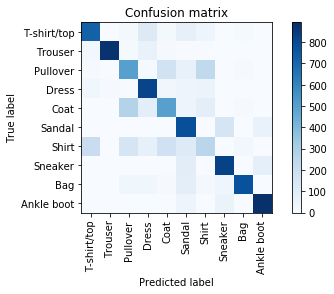

             precision    recall  f1-score   support

          0       0.73      0.72      0.73      1000
          1       0.98      0.88      0.93      1000
          2       0.50      0.50      0.50      1000
          3       0.68      0.82      0.74      1000
          4       0.55      0.50      0.52      1000
          5       0.58      0.79      0.67      1000
          6       0.36      0.25      0.30      1000
          7       0.77      0.83      0.80      1000
          8       0.93      0.78      0.85      1000
          9       0.87      0.89      0.88      1000

avg / total       0.70      0.70      0.69     10000



In [26]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8546439722018904
Accuracy score: 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]
Plotting confusion matrix


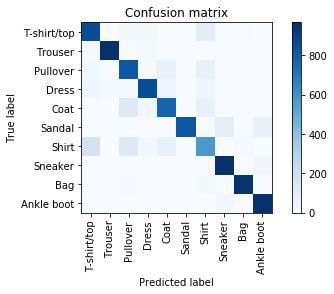

             precision    recall  f1-score   support

          0       0.77      0.85      0.81      1000
          1       0.99      0.97      0.98      1000
          2       0.73      0.82      0.77      1000
          3       0.90      0.86      0.88      1000
          4       0.79      0.77      0.78      1000
          5       0.99      0.82      0.90      1000
          6       0.66      0.57      0.61      1000
          7       0.88      0.96      0.92      1000
          8       0.97      0.95      0.96      1000
          9       0.90      0.97      0.93      1000

avg / total       0.86      0.86      0.85     10000



In [27]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn))

-----------------Random Forest Report---------------
F1 score: 0.8739383581005006
Accuracy score: 0.8755
Confusion matrix: 
 [[866   0  11  28   5   1  77   0  12   0]
 [  3 962   3  20   5   0   6   0   1   0]
 [ 13   0 796  11 120   0  58   0   2   0]
 [ 20   2  10 908  32   0  25   0   2   1]
 [  1   0  97  36 816   0  48   0   2   0]
 [  0   0   0   1   0 957   0  31   1  10]
 [158   1 121  30  86   0 583   0  21   0]
 [  0   0   0   0   0  10   0 951   0  39]
 [  0   2   6   3   4   2   5   4 973   1]
 [  0   0   0   0   0   9   0  45   3 943]]
Plotting confusion matrix


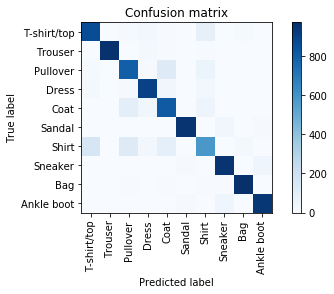

             precision    recall  f1-score   support

          0       0.82      0.87      0.84      1000
          1       0.99      0.96      0.98      1000
          2       0.76      0.80      0.78      1000
          3       0.88      0.91      0.89      1000
          4       0.76      0.82      0.79      1000
          5       0.98      0.96      0.97      1000
          6       0.73      0.58      0.65      1000
          7       0.92      0.95      0.94      1000
          8       0.96      0.97      0.96      1000
          9       0.95      0.94      0.95      1000

avg / total       0.87      0.88      0.87     10000



In [28]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(x_test)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

-----------------Decision Tree Report---------------
F1 score: 0.8010979874804143
Accuracy score: 0.8006
Confusion matrix: 
 [[730   3  22  45  12   1 172   1  13   1]
 [  6 948   2  29   6   0   7   0   2   0]
 [ 20   1 686  14 142   0 129   0   7   1]
 [ 41  35  17 789  58   0  49   0  10   1]
 [ 10   2 153  42 677   0 110   0   6   0]
 [  0   1   1   2   1 894   1  68   6  26]
 [145   7 125  41 104   1 554   0  23   0]
 [  0   0   0   0   0  46   0 895   7  52]
 [  8   2   9   3   3  13  18   8 929   7]
 [  1   0   0   1   0  18   0  71   5 904]]
Plotting confusion matrix


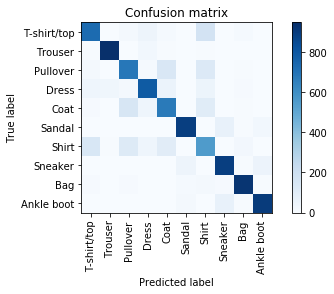

             precision    recall  f1-score   support

          0       0.76      0.73      0.74      1000
          1       0.95      0.95      0.95      1000
          2       0.68      0.69      0.68      1000
          3       0.82      0.79      0.80      1000
          4       0.67      0.68      0.68      1000
          5       0.92      0.89      0.91      1000
          6       0.53      0.55      0.54      1000
          7       0.86      0.90      0.88      1000
          8       0.92      0.93      0.93      1000
          9       0.91      0.90      0.91      1000

avg / total       0.80      0.80      0.80     10000



In [30]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(x_test)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree))

# Features Extraction using PCA

In this section, I attempt to use PCA to reduce the number of features

In [8]:
from sklearn.decomposition import PCA

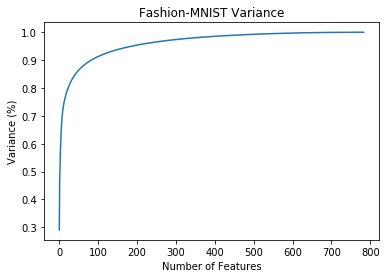

In [9]:
# fit the PCA with the training data
pca = PCA().fit(x_train)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

The Variance graph showed that by using around 340 features, we can retain approximately 96% of the data.

In [10]:
pca = PCA(n_components=340)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=340, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [12]:
x_train_pca.shape

(60000, 340)

# SVM model

In [15]:
from sklearn.svm import SVC
svc = SVC(C=10, kernel='poly')
svc.fit(x_train_pca, y_train)

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

-----------------**SVM Report**---------------

F1 score: 0.8221032442673119
Accuracy score: 0.8153
Confusion matrix: 
 [[792   0   5  45   3   2 147   0   6   0]
 [  5 925   6  36   2   0  26   0   0   0]
 [  9   1 583   8  76   0 321   0   2   0]
 [ 27   3   2 820  23   0 124   0   1   0]
 [  1   0  71  31 650   0 242   0   5   0]
 [  0   0   0   0   0 920   6  51   2  21]
 [156   0  65  21  59   0 682   0  17   0]
 [  0   0   0   0   0  33   0 920   1  46]
 [  1   0   4   5   2   3  52   4 929   0]
 [  0   0   0   0   0  21   4  42   1 932]]
Plotting confusion matrix


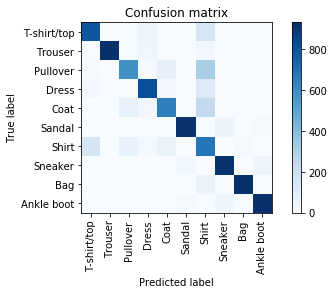

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1000
           1       1.00      0.93      0.96      1000
           2       0.79      0.58      0.67      1000
           3       0.85      0.82      0.83      1000
           4       0.80      0.65      0.72      1000
           5       0.94      0.92      0.93      1000
           6       0.43      0.68      0.52      1000
           7       0.90      0.92      0.91      1000
           8       0.96      0.93      0.95      1000
           9       0.93      0.93      0.93      1000

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000



In [16]:
y_pred_svc = svc.predict(x_test_pca)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
printmd("-----------------**SVM Report**---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

# K-nearest neighbors Model (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

-----------------**K-nearest neighbors Report**---------------

F1 score: 0.8589274895692177
Accuracy score: 0.8596
Confusion matrix: 
 [[852   1  18  16   4   1 100   1   7   0]
 [  7 970   4  12   4   0   2   0   1   0]
 [ 22   2 810  12  90   0  63   0   1   0]
 [ 39  10  16 864  37   0  31   0   3   0]
 [  2   1 125  25 773   0  71   0   3   0]
 [  1   0   0   0   0 844   2  86   1  66]
 [167   3 127  22  78   0 593   0  10   0]
 [  0   0   0   0   0   5   0 960   0  35]
 [  2   0   9   3   8   0  12   7 958   1]
 [  0   0   0   0   0   1   1  26   0 972]]
Plotting confusion matrix


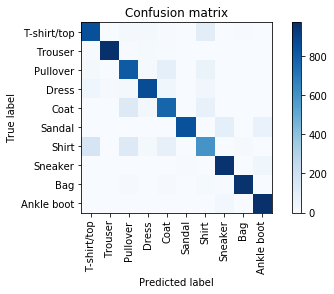

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.91      0.86      0.88      1000
           4       0.78      0.77      0.78      1000
           5       0.99      0.84      0.91      1000
           6       0.68      0.59      0.63      1000
           7       0.89      0.96      0.92      1000
           8       0.97      0.96      0.97      1000
           9       0.91      0.97      0.94      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [16]:
y_pred_knn = knn.predict(x_test_pca)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
printmd("-----------------**K-nearest neighbors Report**---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn))

# Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

-----------------**Random Forest Report**---------------

F1 score: 0.8486088069525833
Accuracy score: 0.8515
Confusion matrix: 
 [[857   1  17  37   3   4  61   0  20   0]
 [  7 949   6  28   4   0   4   0   2   0]
 [ 15   0 790  13 114   0  57   0  11   0]
 [ 37   2   5 887  30   1  30   0   8   0]
 [  4   0 112  39 782   2  54   0   7   0]
 [  0   0   0   2   0 910   0  48   6  34]
 [205   0 130  28  93   2 511   0  31   0]
 [  0   0   0   0   0  24   0 927   1  48]
 [  6   1   4   7   6  14   3   4 953   2]
 [  0   0   0   0   0  16   0  33   2 949]]
Plotting confusion matrix


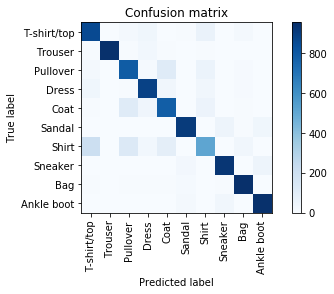

              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1000
           1       1.00      0.95      0.97      1000
           2       0.74      0.79      0.77      1000
           3       0.85      0.89      0.87      1000
           4       0.76      0.78      0.77      1000
           5       0.94      0.91      0.92      1000
           6       0.71      0.51      0.59      1000
           7       0.92      0.93      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.92      0.95      0.93      1000

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [19]:
y_pred_forest = random_forest.predict(x_test_pca)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
printmd("-----------------**Random Forest Report**---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

# Decision Trees model

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

-----------------**Decision Tree Report**---------------

F1 score: 0.6541757030845802
Accuracy score: 0.6618
Confusion matrix: 
 [[594 105  31  40  11  12  55   0 152   0]
 [  4 865   7  62   2  13  18   0  29   0]
 [ 17  18 663   3  81  16  92   0 108   2]
 [ 28 176  17 562  33  34  48   0 102   0]
 [  3  12 175  31 598  11  81   0  89   0]
 [  7   0  24   0   0 701  40 198  20  10]
 [136 104 222  19 125  31 222   0 141   0]
 [  1   2   2   0   1 116   1 836   0  41]
 [ 24   1  44   9  20  22  37  22 818   3]
 [  1   0  24   0  24  31  14  96  51 759]]
Plotting confusion matrix


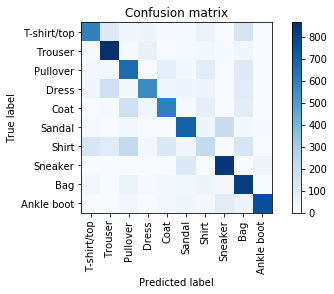

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1000
           1       0.67      0.86      0.76      1000
           2       0.55      0.66      0.60      1000
           3       0.77      0.56      0.65      1000
           4       0.67      0.60      0.63      1000
           5       0.71      0.70      0.71      1000
           6       0.37      0.22      0.28      1000
           7       0.73      0.84      0.78      1000
           8       0.54      0.82      0.65      1000
           9       0.93      0.76      0.84      1000

   micro avg       0.66      0.66      0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000



In [33]:
y_pred_tree = gnb.predict(x_test_pca)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
printmd("-----------------**Decision Tree Report**---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree))

# CNN model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers, regularizers

In [66]:
# reshape the input into 4D array for CNN model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [68]:
# One hot encode the outcome
num_classes = 10

# Converts a class vector (integers) to binary class matrix.   One-hot encoding!  Use with categorical_crossentropy.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [69]:
y_train.shape

(60000, 10)

In [70]:
checkpointer = ModelCheckpoint(filepath="save/cnn_mnist.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (28, 28, 1)
weight_decay = 1e-4

#Build network
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.34)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.36))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=50, batch_size=64, shuffle=True)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
print('Training finished...Loading the best model')  
print()
model.load_weights('save/cnn_mnist.hdf5') # load weights from best model

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
 - 22s - loss: 0.5303 - acc: 0.8381 - val_loss: 0.4066 - val_acc: 0.8817
Epoch 2/1000
 - 20s - loss: 0.3655 - acc: 0.8984 - val_loss: 0.3651 - val_acc: 0.9020
Epoch 3/1000
 - 20s - loss: 0.3391 - acc: 0.9112 - val_loss: 0.3900 - val_acc: 0.8928
Epoch 4/1000
 - 19s - loss: 0.3290 - acc: 0.9163 - val_loss: 0.3607 - val_acc: 0.9047
Epoch 5/1000
 - 20s - loss: 0.3301 - acc: 0.9207 - val_loss: 0.3498 - val_acc: 0.9169
Epoch 6/1000
 - 19s - loss: 0.3260 - acc: 0.9246 - val_loss: 0.3689 - val_acc: 0.9081
Epoch 7/1000
 - 19s - loss: 0.3284 - acc: 0.9272 - val_loss: 0.3735 - val_acc: 0.9171
Epoch 8/1000
 - 19s - loss: 0.3319 - acc: 0.9295 - val_loss: 0.3841 - val_acc: 0.9138
Epoch 9/1000
 - 19s - loss: 0.3317 - acc: 0.9332 - val_loss: 0.3778 - val_acc: 0.9184
Epoch 10/1000
 - 20s - loss: 0.3315 - acc: 0.9352 - val_loss: 0.3775 - val_acc: 0.9235
Epoch 00010: early stopping
Training finished...Loading the best model



In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 128)       73856     
__________

-----------------**Convolutional Neural Network Report**---------------

F1 score: 0.9161150492889818
Confusion matrix: 
 [[898   1  19   4   3   1  66   0   8   0]
 [  1 983   1   6   5   0   4   0   0   0]
 [ 13   1 906   4  40   0  34   0   2   0]
 [ 23   7  13 904  21   0  29   0   2   1]
 [  0   1  45  12 904   0  37   0   1   0]
 [  0   0   0   0   0 977   0  19   0   4]
 [118   2  70  18 104   0 686   0   2   0]
 [  0   0   0   0   0   3   0 991   0   6]
 [  4   0   3   3   0   1   2   4 983   0]
 [  1   0   0   0   0   3   0  59   0 937]]
Plotting confusion matrix


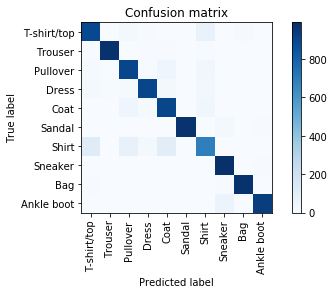

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.91      0.88      1000
           3       0.95      0.90      0.93      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.80      0.69      0.74      1000
           7       0.92      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [77]:
cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)
printmd("-----------------**Convolutional Neural Network Report**---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm_mnist, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_pred_mnist))

# CIFAR-10 dataset

The following information is taken from Keras website: https://keras.io/datasets/  
The CIFAR-10 dataset consists of 50,000 32x32 color training images of 10 categories, along with a test set of 10,000 images.  
The class labels for the data are:

| Label | Description | 
| --- | --- | 
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |

In [45]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


Image (#1902): Which is label number '[7]', or label 'horse''


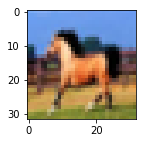

In [46]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(2,2))
plt.imshow(each, interpolation='nearest')
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample][0]]))

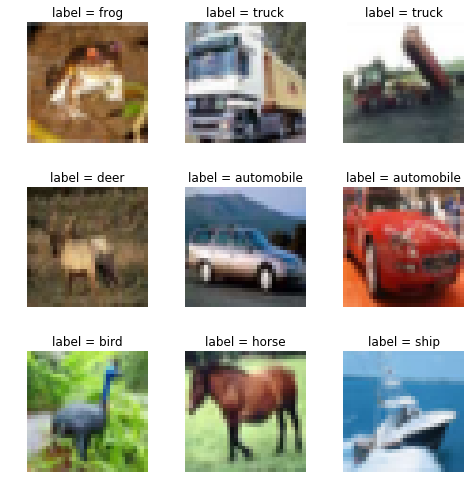

In [47]:
ROW = 3
COLUMN = 3
plt.figure(figsize=(7, 7)) 
for i in range(ROW * COLUMN):
    image = x_train[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, interpolation='nearest')  
    plt.title('label = {}'.format(labelNames[y_train[i][0]]))
    plt.axis('off')
    plt.tight_layout()   
    
plt.show()

In [48]:
#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [50]:
np.amin(x_train)

0

In [28]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
# One hot encode the outcome
num_classes = 10

# Converts a class vector (integers) to binary class matrix.   One-hot encoding!  Use with categorical_crossentropy.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
y_train.shape

(50000, 10)

In [44]:
checkpointer = ModelCheckpoint(filepath="save/cnn_cifar.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (32, 32, 3)
weight_decay = 1e-4

#Build network
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.34)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.36))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=1000, batch_size=64, shuffle=True)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
    
print('Training finished...Loading the best model')  
print()
model.load_weights('save/cnn_cifar.hdf5') # load weights from best model

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
 - 21s - loss: 1.4136 - acc: 0.5251 - val_loss: 1.2506 - val_acc: 0.6086
Epoch 2/1000
 - 18s - loss: 0.9358 - acc: 0.7061 - val_loss: 1.0458 - val_acc: 0.6848
Epoch 3/1000
 - 19s - loss: 0.8043 - acc: 0.7610 - val_loss: 1.0436 - val_acc: 0.6920
Epoch 4/1000
 - 18s - loss: 0.7330 - acc: 0.7961 - val_loss: 1.0360 - val_acc: 0.7202
Epoch 5/1000
 - 18s - loss: 0.6939 - acc: 0.8220 - val_loss: 0.8845 - val_acc: 0.7756
Epoch 6/1000
 - 19s - loss: 0.6778 - acc: 0.8393 - val_loss: 0.7959 - val_acc: 0.8083
Epoch 7/1000
 - 18s - loss: 0.6640 - acc: 0.8545 - val_loss: 0.9418 - val_acc: 0.7767
Epoch 8/1000
 - 18s - loss: 0.6492 - acc: 0.8690 - val_loss: 1.1160 - val_acc: 0.7396
Epoch 9/1000
 - 18s - loss: 0.6461 - acc: 0.8745 - val_loss: 0.8979 - val_acc: 0.8118
Epoch 10/1000
 - 18s - loss: 0.6393 - acc: 0.8842 - val_loss: 0.7944 - val_acc: 0.8405
Epoch 11/1000
 - 18s - loss: 0.6443 - acc: 0.8877 - val_loss: 0.8579 - val_acc: 0.8347
Ep